In [1]:
import pymrio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
'''
Data setup --> imported from Z_analysis
Note: this will take a while to run. Something like 3 mins
'''

exio3 = pymrio.parse_exiobase3(path='/Users/jeffreyzhou/Desktop/MRIO/Data/IOT_2014_pxp.zip')
all_regions = exio3.get_regions()
all_sectors = exio3.get_sectors()

#include all missing calculations with calc_all()
exio3.calc_all()

#US Z matrix - transaction matrix
us_z = exio3.Z.aggregate('US')

#US Y matrix - final demand matrix
us_y = exio3.Y.aggregate('US')

trade_matrix_dict = {}
count = 0
lower_bound = 0
upper_bound = 200

for region in all_regions:
    trade_matrix_dict[region] = us_z.iloc[lower_bound:upper_bound]
    lower_bound += 200
    upper_bound += 200

demand_matrix_dict = {}
count = 0
lower_bound = 0
upper_bound = 200

for region in all_regions:
    demand_matrix_dict[region] = us_y.iloc[lower_bound:upper_bound]
    lower_bound += 200
    upper_bound += 200

trade_calcvalues_dict = {}
    
for region in all_regions:
    tm = trade_matrix_dict[region]
    d = {}
    for sector in all_sectors:
        d[sector] = tm[sector].values.sum()
    in_series = pd.Series(data = d, index = all_sectors)
    trade_calcvalues_dict[region] = in_series

US_total_trade = {}

for sector in all_sectors:
    in_dict = {}
    for region in all_regions:
        if region == 'US': # comment out this line if including domestic inputs
            continue
        in_dict[region] = trade_calcvalues_dict[region][sector]
    US_total_trade[sector] = in_dict

In [4]:
#function that plots graphs of specific width and height.

def plot_func(x, y, xlabel, ylabel, title):
    fig = plt.figure(figsize=(16, 5))
    ax = fig.add_subplot(111)
    ax.bar(x,y)
    fig.suptitle(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=16)

    
    plt.show()

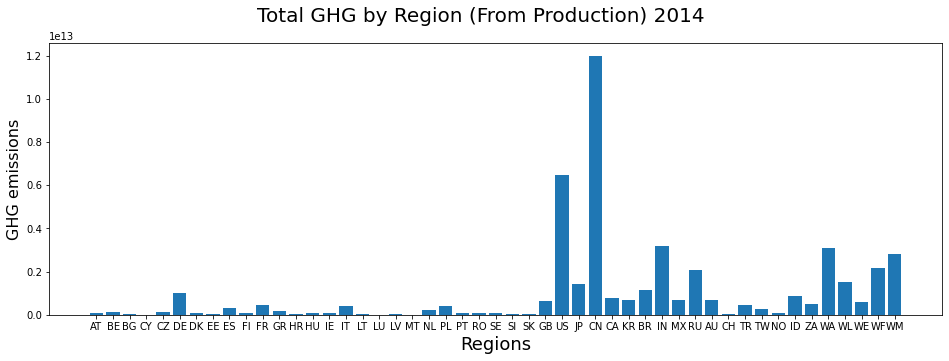

In [29]:
#Production impacts (GHG) per region
regional_prod_ghg = exio3.impacts.D_pba_reg.loc['GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)']
plot_func(all_regions, regional_prod_ghg.to_list(), 'Regions', 'GHG emissions', "Total GHG by Region (From Production) 2014")

# X Matrix: Total produciton output ($) of every region AND every sector 
All_region_total_output = exio3.x.to_dict()['indout']

# Consumption impacts
imports = exio3.impacts.D_imp.US.loc['GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)']

consumption = exio3.impacts.D_cba.US.loc['GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)']

In [30]:
print(f"2014 GHG from imports : {imports.sum()}")
print(f"2014 GHG from total consumption : {consumption.sum()}")
print(f"sum: {imports.sum() + consumption.sum()}")

imports = imports.to_dict()
consumption = consumption.to_dict()

impacts_percent= {}
count = 0
for sector in all_sectors:
    d = consumption[sector]
    n = imports[sector]
    if d == 0:
        count += 1
        if n != 0:
            print("ERROR")
        impacts_percent[sector] = 'NA'
        continue
    percent = n / (d + n)
    impacts_percent[sector] = percent
count

2014 GHG from imports : 1651811300720.776
2014 GHG from total consumption : 5939921071758.176
sum: 7591732372478.951


28

In [ ]:
df = pd.DataFrame(data=all_sectors)
x, y = zip(*impacts_percent.items())




2014: 7.59 × 10^12 vs 7.52 x 10^12


In [41]:
pd.options.display.max_seq_items = 2000


all_sectors

Index(['Paddy rice', 'Wheat', 'Cereal grains nec', 'Vegetables, fruit, nuts',
       'Oil seeds', 'Sugar cane, sugar beet', 'Plant-based fibers',
       'Crops nec', 'Cattle', 'Pigs', 'Poultry', 'Meat animals nec',
       'Animal products nec', 'Raw milk', 'Wool, silk-worm cocoons',
       'Manure (conventional treatment)', 'Manure (biogas treatment)',
       'Products of forestry, logging and related services (02)',
       'Fish and other fishing products; services incidental of fishing (05)',
       'Anthracite', 'Coking Coal', 'Other Bituminous Coal',
       'Sub-Bituminous Coal', 'Patent Fuel', 'Lignite/Brown Coal',
       'BKB/Peat Briquettes', 'Peat',
       'Crude petroleum and services related to crude oil extraction, excluding surveying',
       'Natural gas and services related to natural gas extraction, excluding surveying',
       'Natural Gas Liquids', 'Other Hydrocarbons',
       'Uranium and thorium ores (12)', 'Iron ores',
       'Copper ores and concentrates', 'Nickel 